In [2]:
import numpy as np

In [3]:
def init_qubit():
    return np.array([[1],[0]])              

In [4]:
qubit = init_qubit()

qubit

array([[1],
       [0]])

In [20]:
x_2 = np.array([[0,1],[1,0]])
x_4 = np.array([[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])
H_2 = np.array([[1,1],[1,-1]]) / np.sqrt(2)
H_4 = np.array([[1,1,1,1],[1,-1,1,-1],[1,1,-1,-1],[1,-1,-1,1]]) / 2
C_2 = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])


In [13]:
def x_gate(qubit):
    return np.dot(x_2, qubit)
        

In [14]:
def H_gate(qubit):
    return np.dot(H_2, qubit)


In [15]:
def CNOT_gate(qubit_1, qubit_2):
    if qubit_1 == np.array([[1], [0]]):
        return qubit_2
    elif qubit_1 == np.array([[0], [1]]):
        return x_gate(qubit_2)

In [32]:
def merge_compute(qubit_1, qubit_2):
    return np.kron( qubit_2, qubit_1)

In [33]:
qubit0 = init_qubit()
qubit1 = init_qubit()

# qubit0_H = H_gate(qubit0)

psi_1 = merge_compute(qubit0, qubit1)

psi_2 = np.dot(np.kron(H_2, np.eye(2)), psi_1)
psi_2

array([[0.70710678],
       [0.        ],
       [0.70710678],
       [0.        ]])

In [48]:
psi_3 = np.dot(C_2, psi_2)
psi_3

array([[0.70710678],
       [0.        ],
       [0.        ],
       [0.70710678]])

In [51]:
def simulator(psi,shots=100):
    shots_range= np.random.randint(0, 2, size=shots)
    results = []
    for shot in shots_range:
        if shot == 0:
            results.append("00")
        else:
            results.append("11")
    results.append("01")  # Adding the last result as per original code
    results.append("10")  # Adding the last result as per original code
    return np.array(results)    

In [72]:
simulator_results = simulator(psi_3, shots=100000)
simulator_results.sort()

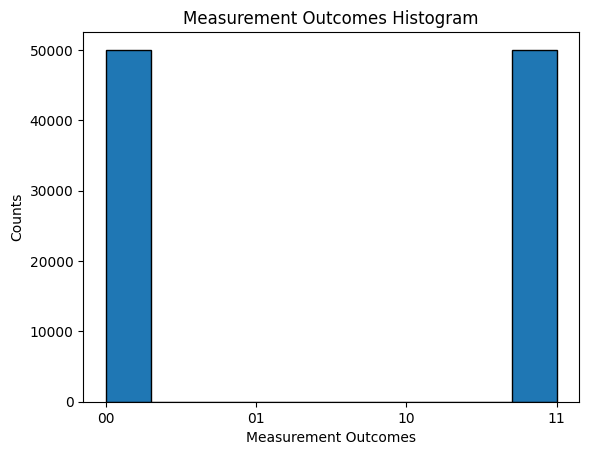

In [73]:
import matplotlib.pyplot as plt

plt.hist(simulator_results, bins=10, edgecolor='black')
plt.xlabel('Measurement Outcomes')  
plt.ylabel('Counts')
plt.title('Measurement Outcomes Histogram')
plt.show()